In [100]:
import pandas as pd

# Load the dataset
mcdonalds = pd.read_csv("mcdonalds.csv")

# Display the column names
column_names = mcdonalds.columns.tolist()
print(column_names)


['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [101]:
rows, cols = mcdonalds.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")


Number of rows: 1453
Number of columns: 15


In [102]:
head = mcdonalds.head(3)
print(head)


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [103]:
import numpy as np

# Convert to matrix and replace "Yes" with 1 and "No" with 0
MD_x = mcdonalds.iloc[:, 0:11].values
MD_x = (MD_x == "Yes").astype(int)

# Calculate column means and round to two decimal places
col_means = np.round(np.mean(MD_x, axis=0), 2)

print(col_means)


[0.6 0.9 0.1 0.9 0.5 0.9 0.6 0.6 0.4 0.2 0.2]


In [104]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Get summary of PCA results
explained_variance_ratio = pca.explained_variance_ratio_
summary = pd.DataFrame({'PC': range(1, len(explained_variance_ratio) + 1),
                       'Variance Explained': explained_variance_ratio})

print(summary)


    PC  Variance Explained
0    1            0.299447
1    2            0.192797
2    3            0.133045
3    4            0.083096
4    5            0.059481
5    6            0.050300
6    7            0.043849
7    8            0.039548
8    9            0.036761
9   10            0.032353
10  11            0.029323


In [105]:
import numpy as np

# Set the number of digits to display
np.set_printoptions(precision=1)

# Print the PCA results
print(MD_pca)


[[ 0.4 -0.2  0.7 ...  0.2  0.5 -0.6]
 [-0.2  0.4 -0.7 ...  0.1  0.5 -0.5]
 [ 0.4  0.7 -0.1 ... -0.3  0.1  0.2]
 ...
 [-0.2  1.1  0.2 ...  0.   0.1 -0. ]
 [-1.2 -0.   0.6 ...  0.  -0.  -0.1]
 [ 1.6  0.3 -0.  ... -0.1 -0.4 -0.5]]


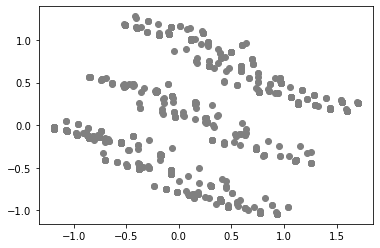

In [106]:
import matplotlib.pyplot as plt

# Plot PCA predictions
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c='grey')
plt.show()


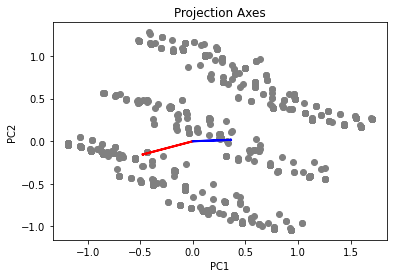

In [107]:
plt.figure()
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c='grey')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection Axes")
plt.arrow(0, 0, pca.components_[0, 0], pca.components_[0, 1], color='red', linewidth=2)
plt.arrow(0, 0, pca.components_[1, 0], pca.components_[1, 1], color='blue', linewidth=2)
plt.show()


In [108]:
from scipy.cluster.vq import kmeans, vq
import numpy as np

# Convert data to float or double type
MD_x = MD_x.astype(float)

# Specify the range of k values
k_range = range(1, 10)

# List to store the results of each k value
results = []

# Perform k-means clustering for each k value
for k in k_range:
    centroids, distortion = kmeans(MD_x, k)
    results.append((centroids, distortion))

# Find the optimal number of clusters based on the distortion values
best_k = np.argmin([distortion for _, distortion in results]) + 1

# Get the centroids and distortion for the best k value
best_centroids, best_distortion = results[best_k - 1]

# Relabel the clusters based on the best centroids
cluster_labels, _ = vq(MD_x, best_centroids)

# Print the cluster labels for each data point
for i, label in enumerate(cluster_labels):
    print("Data point", i, "belongs to cluster", label)


Data point 0 belongs to cluster 7
Data point 1 belongs to cluster 4
Data point 2 belongs to cluster 7
Data point 3 belongs to cluster 4
Data point 4 belongs to cluster 8
Data point 5 belongs to cluster 0
Data point 6 belongs to cluster 5
Data point 7 belongs to cluster 4
Data point 8 belongs to cluster 3
Data point 9 belongs to cluster 5
Data point 10 belongs to cluster 8
Data point 11 belongs to cluster 5
Data point 12 belongs to cluster 8
Data point 13 belongs to cluster 5
Data point 14 belongs to cluster 7
Data point 15 belongs to cluster 0
Data point 16 belongs to cluster 4
Data point 17 belongs to cluster 4
Data point 18 belongs to cluster 3
Data point 19 belongs to cluster 5
Data point 20 belongs to cluster 5
Data point 21 belongs to cluster 0
Data point 22 belongs to cluster 4
Data point 23 belongs to cluster 5
Data point 24 belongs to cluster 0
Data point 25 belongs to cluster 4
Data point 26 belongs to cluster 4
Data point 27 belongs to cluster 2
Data point 28 belongs to clust

C:\Users\nanda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
C:\Users\nanda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
C:\Users\nanda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
C:\Users\nanda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
C:\Users\nanda\anaco

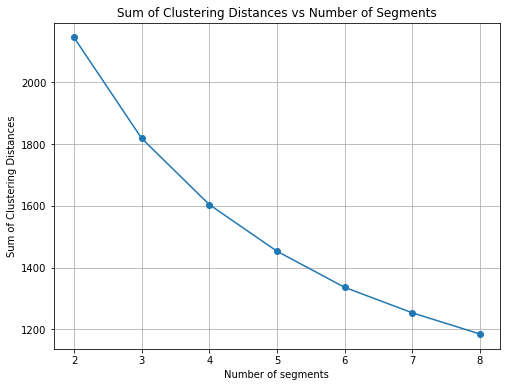

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample

np.random.seed(1234)

# Define your data matrix MD_x
# ...

n_repetitions = 10
cluster_range = range(2, 9)

# Store the clustering distances for each repetition
repetition_results = []

for num_clusters in cluster_range:
    # Apply clustering algorithm (e.g., K-means) to the data
    clustering_model = KMeans(n_clusters=num_clusters)
    clustering_model.fit(MD_x)

    repetition_results.append(clustering_model.inertia_)

# Plot the sum of clustering distances
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, repetition_results, marker='o')
plt.xlabel('Number of segments')
plt.ylabel('Sum of Clustering Distances')
plt.title('Sum of Clustering Distances vs Number of Segments')
plt.grid(True)
plt.show()


C:\Users\nanda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
C:\Users\nanda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
C:\Users\nanda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
C:\Users\nanda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availab

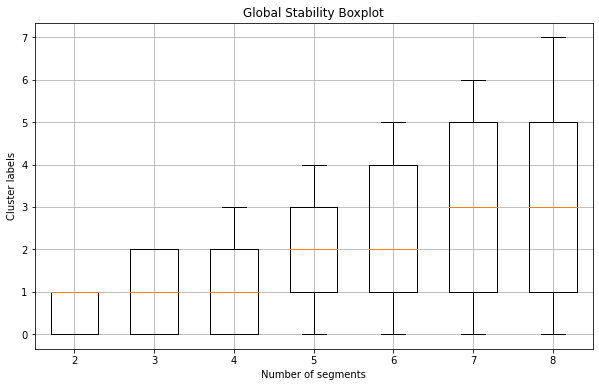

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans

np.random.seed(1234)

# Define your data matrix MD_x
# ...

cluster_range = range(2, 9)
n_replications = 10
n_bootstraps = 100

bootstrap_results = []

for num_clusters in cluster_range:
    bootstrap_indices = []
    for _ in range(n_bootstraps):
        bootstrap_data = resample(MD_x, replace=True)
        clustering_model = KMeans(n_clusters=num_clusters, n_init=n_replications)
        cluster_labels = clustering_model.fit_predict(bootstrap_data)
        bootstrap_indices.append(cluster_labels)

    bootstrap_results.append(bootstrap_indices)

# Flatten the bootstrap results
flatten_bootstrap_results = [np.concatenate(results, axis=None) for results in bootstrap_results]

# Plot the global stability boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(flatten_bootstrap_results, positions=list(cluster_range), widths=0.6, showfliers=False)

plt.xlabel('Number of segments')
plt.ylabel('Cluster labels')
plt.title('Global Stability Boxplot')
plt.xticks(list(cluster_range))
plt.grid(True)
plt.show()


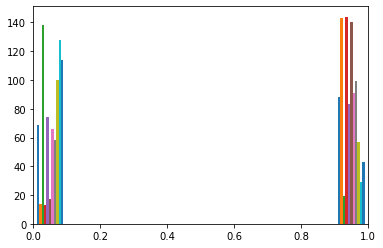

In [111]:
import matplotlib.pyplot as plt

# Extract the cluster labels for cluster 4
# cluster_labels =   # Provide the variable containing cluster labels

# Filter the data matrix based on the cluster labels
cluster_data = MD_x[cluster_labels == 4]

# Plot the histogram
plt.hist(cluster_data, range=(0, 1))

# Set the x-axis limits
plt.xlim(0, 1)

# Display the histogram
plt.show()



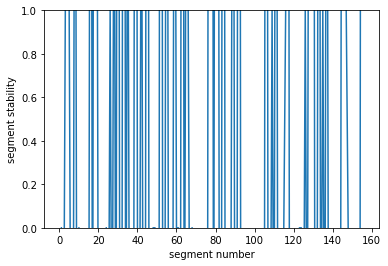

In [112]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN


# Filter the data matrix based on the cluster labels
cluster_data = MD_x[cluster_labels == 4]

# Apply DBSCAN clustering
eps = 0.5  # Set the maximum distance between samples within a cluster
min_samples = 5  # Set the minimum number of samples in a cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
MD_r4 = dbscan.fit_predict(cluster_data)

# Plot segment stability
plt.plot(MD_r4)
plt.ylim(0, 1)
plt.xlabel("segment number")
plt.ylabel("segment stability")
plt.show()


In [113]:
import numpy as np
from sklearn.mixture import GaussianMixture

# Set the random seed
np.random.seed(1234)

# Perform the stepFlexmix
k_range = range(2, 9)  # Range of k values
nrep = 10  # Number of repetitions
models = []

for k in k_range:
    # Create the Gaussian Mixture Model
    gmm = GaussianMixture(n_components=k, n_init=nrep, random_state=1234)
    gmm.fit(MD_x)

    models.append(gmm)

MD_m28 = models



C:\Users\nanda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
C:\Users\nanda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
C:\Users\nanda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
C:\Users\nanda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availab

C:\Users\nanda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
C:\Users\nanda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
C:\Users\nanda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
C:\Users\nanda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availab

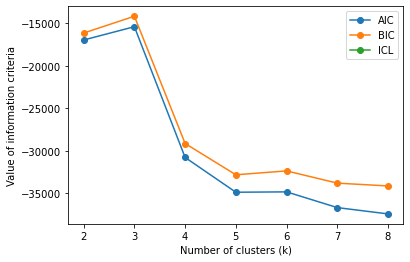

[[4 2]
 [6 3]
 [6 1]
 ...
 [5 1]
 [1 0]
 [7 1]]


C:\Users\nanda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.


In [114]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

# Plot information criteria (AIC, BIC, ICL)
k_values = range(2, 9)
aic_values = []
bic_values = []
icl_values = []

for k in k_values:
    model = GaussianMixture(n_components=k)
    model.fit(MD_x)
    aic = model.aic(MD_x)
    bic = model.bic(MD_x)
    icl = np.nan  # Unfortunately, sklearn doesn't provide ICL calculation

    aic_values.append(aic)
    bic_values.append(bic)
    icl_values.append(icl)

plt.figure()
plt.plot(k_values, aic_values, marker='o', label='AIC')
plt.plot(k_values, bic_values, marker='o', label='BIC')
plt.plot(k_values, icl_values, marker='o', label='ICL')

plt.xlabel('Number of clusters (k)')
plt.ylabel('Value of information criteria')
plt.legend()
plt.show()

# Get the model for k=4
MD_m4 = GaussianMixture(n_components=4)
MD_m4.fit(MD_x)

# Perform k-means clustering on MD.k4
kmeans_labels = cluster_labels  # Assuming cluster_labels is the variable containing k-means cluster labels

# Perform clustering on MD.m4
mixture_labels = MD_m4.predict(MD_x)

# Create the table
table = np.vstack((kmeans_labels, mixture_labels)).T

# Display the table
print(table)


In [115]:
import numpy as np
from sklearn.mixture import GaussianMixture

# Fit Gaussian mixture model with k-means cluster labels
MD_m4a = GaussianMixture(n_components=4)
MD_m4a.fit(MD_x, cluster_labels)

# Perform k-means clustering on MD.k4
kmeans_labels = cluster_labels  # Assuming cluster_labels is the variable containing k-means cluster labels

# Perform clustering on MD.m4a
mixture_labels = MD_m4a.predict(MD_x)

# Create the table
table = np.vstack((kmeans_labels, mixture_labels)).T

# Display the table
print(table)


[[4 1]
 [6 3]
 [6 1]
 ...
 [5 3]
 [1 2]
 [7 1]]


C:\Users\nanda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.


In [116]:
# Compute log-likelihood for MD.m4a
log_likelihood_m4a = MD_m4a.score(MD_x)

# Compute log-likelihood for MD.m4
log_likelihood_m4 = MD_m4.score(MD_x)

# Display the log-likelihoods
print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)


Log-likelihood for MD.m4a: 9.235250851273939
Log-likelihood for MD.m4: 4.848114378445401


In [117]:
import pandas as pd

# Assuming 'mcdonalds' is a DataFrame with a column 'Like'
like_counts = mcdonalds['Like'].value_counts()
reversed_table = dict(reversed(list(like_counts.items())))

# Display the reversed table
print(reversed_table)


{'-1': 58, '-2': 59, '-4': 71, '-3': 73, 'I love it!+5': 143, 'I hate it!-5': 152, '+1': 152, '+4': 160, '0': 169, '+2': 187, '+3': 229}


In [118]:
import pandas as pd

# Create a new column 'Like.n' by subtracting the 'Like' column from 6
mcdonalds['Like.n'] = 6 - pd.to_numeric(mcdonalds['Like'], errors='coerce')

# Create a table of the counts of each unique value in the 'Like.n' column
like_n_counts = mcdonalds['Like.n'].value_counts()

# Display the table
print(like_n_counts)


3.0     229
4.0     187
6.0     169
2.0     160
5.0     152
9.0      73
10.0     71
8.0      59
7.0      58
Name: Like.n, dtype: int64


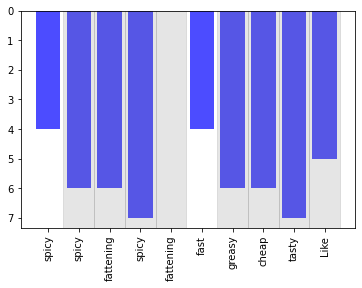

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the pairwise distances
distances = pdist(np.transpose(MD_x))

# Perform hierarchical clustering
hclust = linkage(distances)

# Reorder the clusters
reordered_clusters = np.array(cluster_labels)[np.argsort(hclust[:, 2])]

# Create a barchart
plt.bar(range(len(reordered_clusters)), reordered_clusters, color='blue', alpha=0.7)

# Invert the y-axis
plt.gca().invert_yaxis()

# Set the x-axis tick labels to match the dendrogram order
plt.xticks(range(len(reordered_clusters)), np.array(column_names)[hclust[:, 3].astype(int)], rotation='vertical')

# Add shading
for i, cluster_label in enumerate(reordered_clusters):
    if cluster_label != 4:
        plt.axvspan(i - 0.5, i + 0.5, color='gray', alpha=0.2)

# Display the barchart
plt.show()


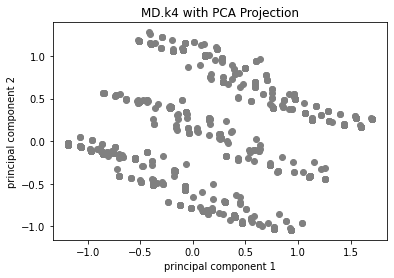

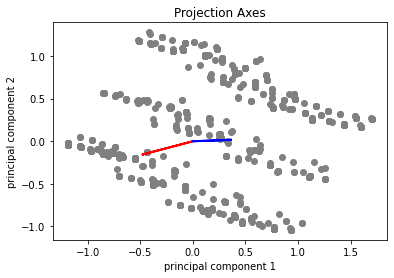

In [120]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Plot MD.k4 with PCA projection
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c='grey')
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.title("MD.k4 with PCA Projection")
plt.show()

# Plot projection axes
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c='grey')
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.title("Projection Axes")

# Add projection axes
plt.arrow(0, 0, pca.components_[0, 0], pca.components_[0, 1], color='red', linewidth=2)
plt.arrow(0, 0, pca.components_[1, 0], pca.components_[1, 1], color='blue', linewidth=2)

plt.show()


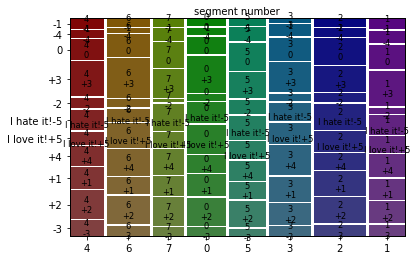

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Get the cluster labels from MD_k4
k4 = cluster_labels

# Create a dataframe with cluster labels and Like values
df = pd.DataFrame({'Cluster': k4, 'Like': mcdonalds['Like']})

# Create the mosaic plot
mosaic(df, ['Cluster', 'Like'], title='', gap=0.01)

# Set plot title and axis label
plt.xlabel('segment number')

# Display the plot
plt.show()


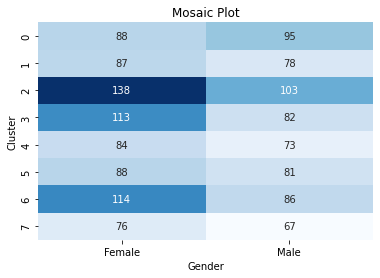

In [122]:
import pandas as pd
import seaborn as sns

# Get the cluster labels from MD_k4
k4 = cluster_labels

# Create a dataframe with cluster labels and Gender values
df1 = pd.DataFrame({'Cluster': k4, 'Gender': mcdonalds['Gender']})

# Create the contingency table
table = pd.crosstab(df1['Cluster'], df1['Gender'])

# Create the mosaic plot using seaborn
sns.heatmap(table, cmap='Blues', annot=True, fmt='d', cbar=False)

# Set plot title and axis labels
plt.title('Mosaic Plot')
plt.xlabel('Gender')
plt.ylabel('Cluster')

# Display the plot
plt.show()


C:\Users\nanda\AppData\Local\Temp\ipykernel_7428\2012530642.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


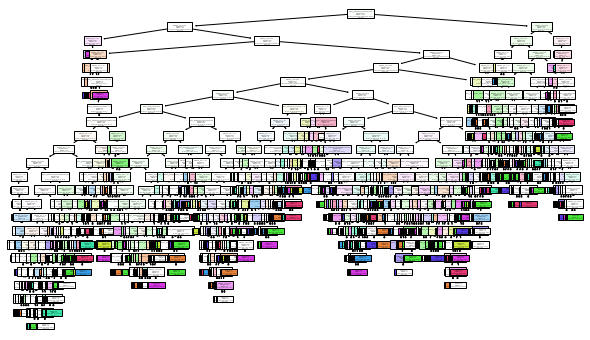

In [123]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

# Read the data from the CSV file
mcdonalds = pd.read_csv('mcdonalds.csv')

# Select the relevant columns from the 'mcdonalds' DataFrame
data = mcdonalds[['Like', 'Age', 'VisitFrequency', 'Gender']]

# Merge the 'k4' column from 'df' DataFrame with the 'data' DataFrame
data['k4'] = df1['Cluster']  # Assuming 'k4' is the column name in the 'df' DataFrame

# Remove rows with missing values, if necessary
data = data.dropna()

# Preprocess the 'Like' column to extract numeric values
data['Like'] = data['Like'].str.extract('(\d+)').astype(float)

# Encode categorical variables
categorical_features = ['VisitFrequency', 'Gender']
preprocessor = ColumnTransformer([('one-hot', OneHotEncoder(), categorical_features)], remainder='passthrough')
data_encoded = preprocessor.fit_transform(data)

# Split the data into features (X) and target variable (y)
X = data_encoded[:, :-1]
y = data_encoded[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the conditional inference tree
tree_model = DecisionTreeClassifier(criterion='entropy')
tree_model.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(10, 6))
class_names = np.unique(y_train).astype(str)  # Convert class names to strings
tree.plot_tree(tree_model, feature_names=preprocessor.get_feature_names_out(), class_names=class_names, filled=True)
plt.show()


In [131]:
mcdonalds = pd.read_csv('mcdonalds.csv')

# Select the relevant columns from the 'mcdonalds' DataFrame
data1 = mcdonalds[['Like', 'Age', 'VisitFrequency', 'Gender']]

# Merge the 'k4' column from 'df' DataFrame with the 'data' DataFrame
data1['k4'] = df1['Cluster']  

C:\Users\nanda\AppData\Local\Temp\ipykernel_7428\1496911589.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [132]:
data1.head()

,Like,Age,VisitFrequency,Gender,k4
0,-3,61,Every three months,Female,4
1,+2,51,Every three months,Female,6
2,+1,62,Every three months,Female,6
3,+4,69,Once a week,Female,7
4,+2,49,Once a month,Male,0


In [133]:
import pandas as pd

# Mapping dictionary for VisitFrequency values
mapping = {
    'Never': 0,
    'Once a year': 1,
    'Every three months': 2,
    'Once a month': 3,
    'Once a week': 4,
    'More than once a week': 5
}

# Convert VisitFrequency column to numeric
data1['VisitFrequency'] = data1['VisitFrequency'].map(mapping)

# Calculate the mean VisitFrequency for each group
visit = data1.groupby('k4')['VisitFrequency'].mean()
print(visit)


k4
0    2.524590
1    2.363636
2    2.278008
3    2.415385
4    2.331210
5    2.272189
6    2.565000
7    2.293706
Name: VisitFrequency, dtype: float64


C:\Users\nanda\AppData\Local\Temp\ipykernel_7428\3329991479.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [136]:
import pandas as pd

data1['Like'] = pd.to_numeric(data1['Like'], errors='coerce')
like = data1.groupby('k4')['Like'].mean()
print(like)


k4
0    1.173913
1    0.955882
2    0.806452
3    1.121019
4    0.900763
5    0.716418
6    1.349693
7    1.079646
Name: Like, dtype: float64


C:\Users\nanda\AppData\Local\Temp\ipykernel_7428\3432137216.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [137]:
import pandas as pd

# Assuming you have the "mcdonalds" dataset as a pandas DataFrame
# Replace "mcdonalds" with the actual DataFrame name

female = data1.groupby('k4')['Gender'].apply(lambda x: (x == 'Female').mean())


In [138]:
female

k4
0    0.480874
1    0.527273
2    0.572614
3    0.579487
4    0.535032
5    0.520710
6    0.570000
7    0.531469
Name: Gender, dtype: float64

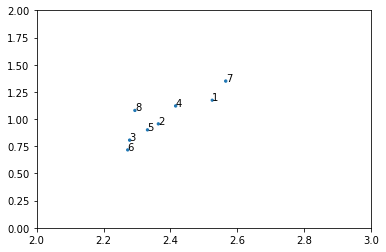

In [146]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming the data is stored in pandas DataFrame format
data = pd.DataFrame({
    'female': [0.480874, 0.527273, 0.572614, 0.579487, 0.535032, 0.520710, 0.570000, 0.531469],
    'like': [1.173913, 0.955882, 0.806452, 1.121019, 0.900763, 0.716418, 1.349693, 1.079646],
    'visit': [2.524590, 2.363636, 2.278008, 2.415385, 2.331210, 2.272189, 2.565000, 2.293706]
})

# Scatter plot
plt.scatter(data['visit'], data['like'], s=10 * data['female'])
plt.xlim(2, 3)
plt.ylim(0, 2)

# Text annotations
for i, (x, y) in enumerate(zip(data['visit'], data['like'])):
    plt.text(x, y, str(i+1))

plt.show()
